In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
%matplotlib inline
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


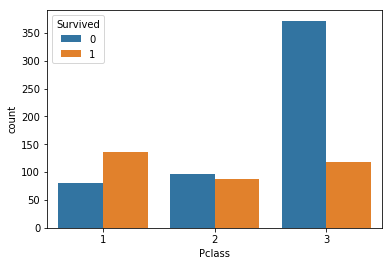

In [4]:
sns.countplot(x='Pclass' , hue='Survived',data=df)

In [5]:
new_df=df.loc[:,['PassengerId','Survived','Pclass','Name','Sex','Age']]
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0


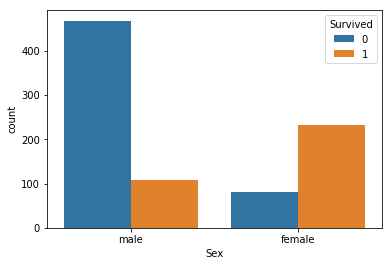

In [6]:
sns.countplot(x='Sex' , hue='Survived',data=df)

In [7]:
first_20=df[df['Age']<=20]
b=first_20['Age'].mean()
print(b)
print(len(first_20))
y=(len(first_20[first_20['Survived']==1]))
print(y)
x=(len(df))
first20Survived=(y/x)*100
print(first20Survived)

12.651787709497206
179
82
9.20314253647587


In [8]:
first_40=df[(df['Age']>20) & (df['Age']<=40)]
print(len(first_40))
q=(len(first_40[first_40['Survived']==1]))
print(q)
w=(len(df))
first40Survived=(q/w)*100
print(first40Survived)

385
153
17.17171717171717


In [9]:
first_60=df[(df['Age']>40) & (df['Age']<=60)]
print(len(first_60))
r=(len(first_60[first_60['Survived']==1]))
print(r)
e=(len(df))
first60Survived=(r/e)*100
print(first60Survived)

128
50
5.611672278338945


In [10]:
first_80=df[(df['Age']>60) & (df['Age']<=80)]
print(len(first_80))
t=(len(first_80[first_80['Survived']==1]))
print(t)
u=(len(df))
first80Survived=(t/u)*100
print(first80Survived)

22
5
0.5611672278338945


In [11]:
p=len(df[df['Survived']==1])

In [12]:
train_test_data = [df, df_test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    df_test['Title'].value_counts()

KeyError: 'Title'

In [ ]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
df.head()

In [ ]:
df.drop('Name', axis=1)
df_test.drop('Name', axis=1)

df.head()

In [ ]:
df['Age'].fillna(value=29,inplace=True)

perfect=df.drop('Survived',axis=1)
perfect=perfect.drop('Name',axis=1)
perfect=perfect.drop('SibSp',axis=1)
perfect=perfect.drop('Parch',axis=1)
perfect=perfect.drop('Fare',axis=1)
perfect=perfect.drop('Cabin',axis=1)
perfect=perfect.drop('Embarked',axis=1)
perfect=perfect.drop('Ticket',axis=1)
X=perfect.drop('Title',axis=1)
X

In [ ]:
y=df['Survived']
y.shape

In [ ]:
knn=KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn.fit(X, y)

In [ ]:
pred=knn.predict(X)
len(pred)

In [ ]:
from sklearn import metrics

In [ ]:
print (metrics.accuracy_score(y, pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(X,y)

In [ ]:
cat=log.predict(X)

In [ ]:
print (metrics.accuracy_score(y, cat))

In [ ]:
len(df)

In [ ]:
svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(X)
acc_svc = round(svc.score(X, y) * 100, 2)
acc_svc

In [ ]:
df_test['Age'].fillna(value=29,inplace=True)


perf=df_test.drop('Name',axis=1)
perf=perf.drop('SibSp',axis=1)
perf=perf.drop('Parch',axis=1)
perf=perf.drop('Fare',axis=1)
perf=perf.drop('Cabin',axis=1)
perf=perf.drop('Embarked',axis=1)
perf=perf.drop('Ticket',axis=1)
perf

In [ ]:
perf['Sex'] = perf['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
perf

In [13]:
dog=log.predict(perf)
dog

NameError: name 'log' is not defined

In [14]:
len(dog)

NameError: name 'dog' is not defined

In [15]:
submit = pd.read_csv("gender_submission.csv")
z=submit.Survived
len(z)

418

In [16]:
submission = pd.DataFrame({
        "PassengerId": perf["PassengerId"],
        "Survived": dog
    })

submission.to_csv('submission.csv', index=False)

NameError: name 'perf' is not defined

In [17]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
